In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel("RR.xlsx", usecols = [0,1,2,3], names = ['Country', 'Year', 'Debt', 'Growth'])

In [3]:
df.head()

,Country,Year,Debt,Growth
0,Australia,1946,190.419080,-3.557951
1,Australia,1947,177.321371,2.459475
2,Australia,1948,148.929811,6.437534
3,Australia,1949,125.828699,6.611994
4,Australia,1950,109.809398,6.920201


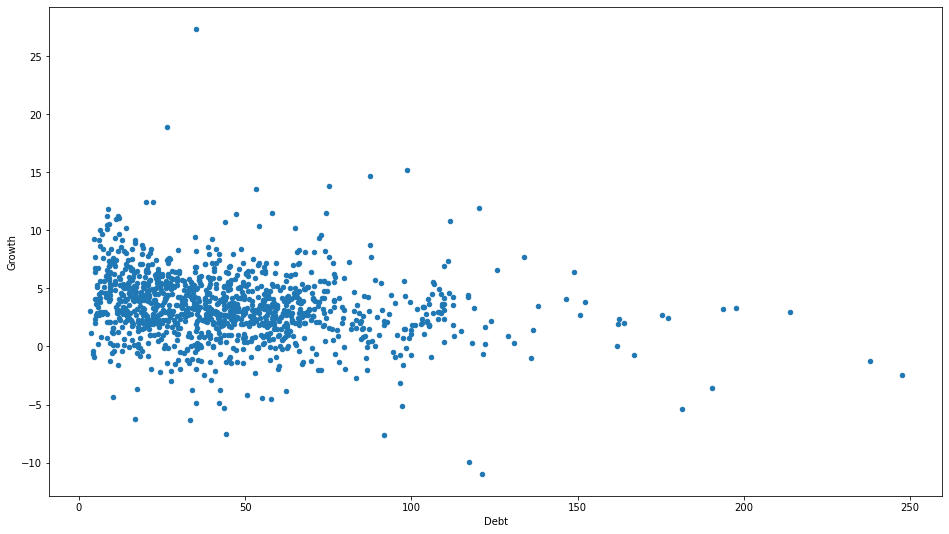

In [4]:
df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.savefig("Growth Debt.png",dpi=144)

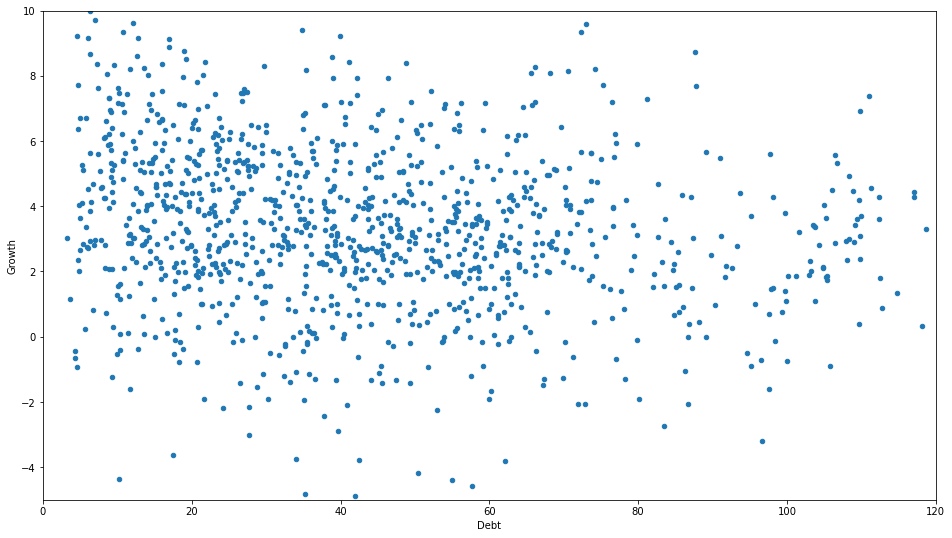

In [5]:
df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.xlim(0,120)
plt.ylim(-5,10)
plt.savefig("Growth Debt zoom.png",dpi=144)

In [6]:
res = smf.ols("Growth ~ Debt", df).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.039    
Dependent Variable: Growth           AIC:                5865.8066
Date:               2020-04-17 09:49 BIC:                5875.9447
No. Observations:   1175             Log-Likelihood:     -2930.9  
Df Model:           1                F-statistic:        48.81    
Df Residuals:       1173             Prob (F-statistic): 4.72e-12 
R-squared:          0.040            Scale:              8.6072   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       4.2704    0.1495  28.5583  0.0000   3.9770   4.5637
Debt           -0.0185    0.0026  -6.9862  0.0000  -0.0237  -0.0133
------------------------------------------------------------------
Omnibus:              200.078      Durbin-Watson:         1.379   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1607.518
Skew:                 0.538        Prob(JB):              0.000   
Kurtosis:             8.628        Condition No.:         99      
==================================================================

"""

In [8]:
print(f"Coeff : {res.params[1]}  p={res.pvalues[1]}   R2={res.rsquared}")

Coeff : -0.01849326702111504  p=4.723997934448348e-12   R2=0.03994632433435641


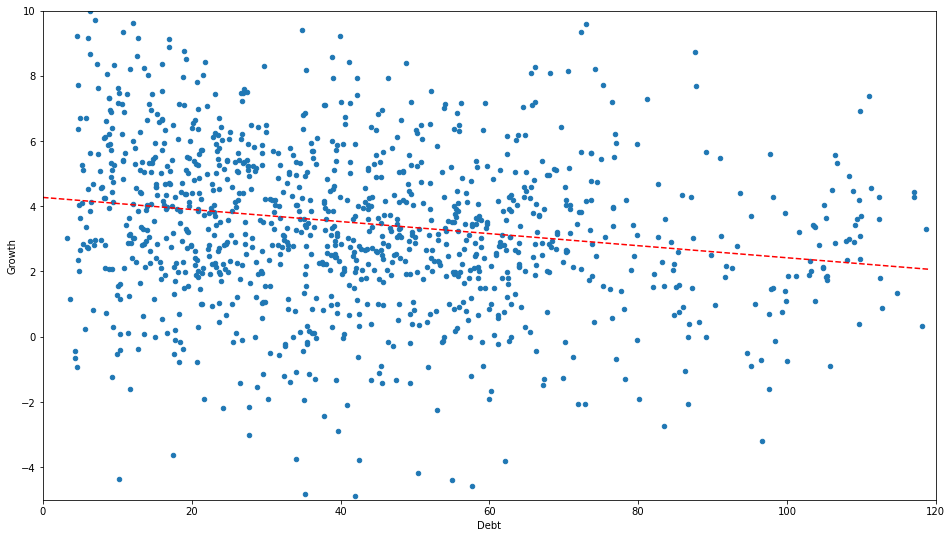

In [10]:
df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.xlim(0,120)
plt.ylim(-5,10)
xs = np.arange(0,120)
ys = res.params[0] + res.params[1] * xs
plt.plot(xs,ys,'r--')
plt.savefig("Growth Debt zoom linreg.png",dpi=144)

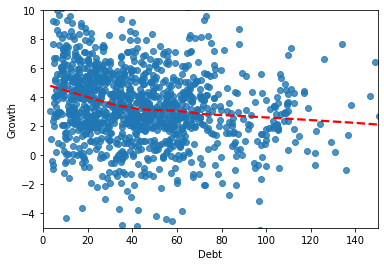

In [11]:
sns.regplot(x="Debt", y="Growth", data=df, lowess=True, line_kws = {'color':'red', 'linestyle':'dashed'})
plt.xlim(0,150)
plt.ylim(-5,10)
plt.savefig("Growth Debt Non lin.png",dpi=300)

In [12]:
res = smf.ols("Growth ~ Debt",df[(df.Debt>30) & (df.Debt<150)]).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.001    
Dependent Variable: Growth           AIC:                3678.7447
Date:               2020-04-17 09:54 BIC:                3687.9390
No. Observations:   733              Log-Likelihood:     -1837.4  
Df Model:           1                F-statistic:        1.695    
Df Residuals:       731              Prob (F-statistic): 0.193    
R-squared:          0.002            Scale:              8.8300   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    3.3934     0.3019   11.2415   0.0000    2.8008   3.9861
Debt        -0.0061     0.0047   -1.3018   0.1934   -0.0153   0.0031
------------------------------------------------------------------
Omnibus:              169.661      Durbin-Watson:         1.616   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      2019.052
Skew:                 0.672        Prob(JB):              0.000   
Kurtosis:             11.019       Condition No.:         177     
==================================================================

"""

In [13]:
res.pvalues[1]

0.19339038568373904

In [11]:
df['DebtBin'] = pd.cut(df.Debt, bins=[0,30,60,90,250],include_lowest=True)
df.groupby('DebtBin').Growth.mean()

DebtBin
(-0.001, 30.0]    4.173523
(30.0, 60.0]      3.092145
(60.0, 90.0]      3.186575
(90.0, 250.0]     2.167972
Name: Growth, dtype: float64